# Init

In [1]:
import os
import sys
from pathlib import Path

file_path = "/root/sharespace/nvae/shibata/NewtonianVAE/exec/test_env.ipynb"
workspaceFolder = Path(file_path).absolute().parent.parent
os.chdir(workspaceFolder)
sys.path.append(str(workspaceFolder))
sys.path.append(str(workspaceFolder / "source"))

print("file_path: ", file_path)
print("workspaceFolder: ", workspaceFolder)

file_path:  /root/sharespace/nvae/shibata/NewtonianVAE/exec/test_env.ipynb
workspaceFolder:  /root/sharespace/nvae/shibata/NewtonianVAE


In [2]:
import numpy as np
import torch
from pprint import pprint
import matplotlib.pyplot as plt

from source.simulation.env import *

# Step up the environment

In [3]:
env_settings = dict(
    env="point_mass-easy",
    seed=0,
    max_episode_length=1000,
    action_repeat=1,
    bit_depth=8,
)
env = ControlSuiteEnvWrap(**env_settings)
obs = env.reset()
img = obs2img(obs)

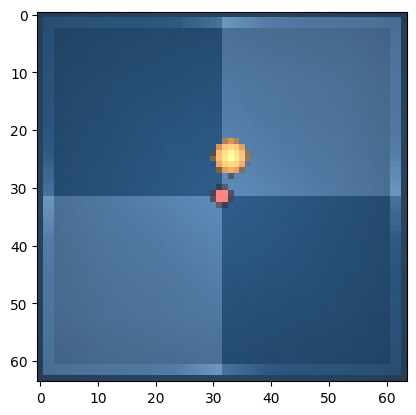

In [4]:
plt.imshow(img)
plt.show()

# Change the parameters

In [5]:
print(env._env._env.physics.named.model.geom_friction["pointmass"])

[1.e+00 5.e-03 1.e-04]


current pointmass position: [0.03082901 0.01346495 0.01      ]
current root position: [array([0.03082901]), array([0.01346495])]
current target position: [0.   0.   0.01]

after pointmass pos: [0.1  0.1  0.01]
after root pos: [array([0.1]), array([0.1])]
after target pos: [0.   0.   0.01]


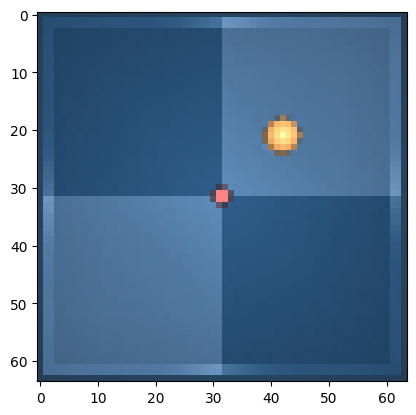

In [6]:
env.reset()

current_mp_pos = env._env._env.physics.named.data.geom_xpos["pointmass"]
current_root_pos = [env._env._env.physics.named.data.qpos["root_x"], env._env._env.physics.named.data.qpos["root_y"]]
current_target_pos = env._env._env.physics.named.data.geom_xpos["target"]
print("current pointmass position: {}".format(current_mp_pos))
print("current root position: {}".format(current_root_pos))
print("current target position: {}".format(current_target_pos))
print("")

with env._env._env.physics.reset_context():
    # change positions
    # env._env._env.physics.named.data.geom_xpos["pointmass"] = [0.1, 0.1, 0.1]
    env._env._env.physics.named.data.qpos["root_x"] = 0.1
    env._env._env.physics.named.data.qpos["root_y"] = 0.1
    # env._env._env.physics.named.data.geom_xpos["target"] = [-0.1, -0.1, current_target_pos[2]]

print("after pointmass pos: {}".format(env._env._env.physics.named.data.geom_xpos["pointmass"]))
print("after root pos: {}".format([env._env._env.physics.named.data.qpos["root_x"], env._env._env.physics.named.data.qpos["root_y"]]))
print("after target pos: {}".format(env._env._env.physics.named.data.geom_xpos["target"]))

dummy_action = [0.0, 0.0]

obs = env.step(torch.tensor(dummy_action))[0]
img = obs2img(obs)

plt.imshow(img)
plt.show()

In [7]:
pprint(env._env._env.physics.named.data.geom_xpos)

FieldIndexer(geom_xpos):
               x         y         z         
0     ground [ 0         0         0       ]
1     wall_x [-0.3       0         0.02    ]
2     wall_y [ 0        -0.3       0.02    ]
3 wall_neg_x [ 0.3       0         0.02    ]
4 wall_neg_y [ 0         0.3       0.02    ]
5     target [ 0         0         0.01    ]
6  pointmass [ 0.1       0.1       0.01    ]


In [8]:
pprint(env._env._env.physics.named.data.qpos)


FieldIndexer(qpos):
0 root_x [ 0.1     ]
1 root_y [ 0.1     ]


上記の実験結果からphysics.named.data.qposの値は変更可能だが、physics.named.data.geom_xposの値は直接変更できないことがわかった。
そのため、もしtargetの位置を変更したい場合は、physics.named.data.geom_xposの値を変更するのではなく、新しくjointを追加するもしくは他の変更可能な数値を発見する必要がある。